In [57]:
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt

In [117]:
controlEmbeddingsWithId = pd.read_csv('pathwayEmbeddingsControls.csv', sep=',', header=0).dropna()
controlEmbeddings = controlEmbeddingsWithId.drop(["id","pathway_id"],axis=1)
basalEmbeddingsWithId = pd.read_csv('pathwayEmbeddingsTumorBasal113.csv', sep=',', header=0).dropna()
basalEmbeddingsWithIdFiltered = basalEmbeddingsWithId[~basalEmbeddingsWithId['pathway_id'].isin(set(basalEmbeddingsWithId["pathway_id"]).difference(set(controlEmbeddingsWithId["pathway_id"])))]
basalEmbeddings = basalEmbeddingsWithIdFiltered.drop(["id","pathway_id"],axis=1)
LumAEmbeddingsWithId = pd.read_csv('pathwayEmbeddingsTumorLumA113.csv', sep=',', header=0).dropna()
LumAEmbeddingsWithIdFiltered = LumAEmbeddingsWithId[~LumAEmbeddingsWithId['pathway_id'].isin(set(LumAEmbeddingsWithId["pathway_id"]).difference(set(controlEmbeddingsWithId["pathway_id"])))]
LumAEmbeddings = LumAEmbeddingsWithIdFiltered.drop(["id","pathway_id"],axis=1)
LumBEmbeddingsWithId = pd.read_csv('pathwayEmbeddingsTumorLumB113.csv', sep=',', header=0).dropna()
LumBEmbeddingsWithIdFiltered = LumBEmbeddingsWithId[~LumBEmbeddingsWithId['pathway_id'].isin(set(LumBEmbeddingsWithId["pathway_id"]).difference(set(controlEmbeddingsWithId["pathway_id"])))]
LumBEmbeddings = LumBEmbeddingsWithIdFiltered.drop(["id","pathway_id"],axis=1)

In [118]:
controlEmbeddings

,0,1,2,3,4,5,6,7,8,9,...,103,104,105,106,107,108,109,110,111,112
0,6.510954e-10,6.014252e-10,6.983304e-10,5.684257e-10,7.005291e-10,7.569749e-10,7.357554e-10,6.050932e-10,6.293364e-10,7.354728e-10,...,7.369704e-10,7.328747e-10,7.324094e-10,7.403353e-10,6.084316e-10,5.575778e-10,6.262796e-10,6.136733e-10,7.109005e-10,7.330226e-10
1,7.271249e-10,6.734769e-10,7.803932e-10,6.370633e-10,7.826474e-10,8.424551e-10,8.221210e-10,6.748746e-10,6.993324e-10,8.213020e-10,...,8.236839e-10,8.209778e-10,8.194155e-10,8.259432e-10,6.799188e-10,6.254155e-10,7.028517e-10,6.854942e-10,7.953582e-10,8.170899e-10
2,6.443080e-10,5.990318e-10,6.932391e-10,5.656706e-10,6.984902e-10,7.508959e-10,7.327737e-10,6.018218e-10,6.264494e-10,7.329379e-10,...,7.318709e-10,7.261918e-10,7.318406e-10,7.392793e-10,6.052422e-10,5.541823e-10,6.239318e-10,6.115486e-10,7.066887e-10,7.281528e-10
3,1.460518e-07,1.380454e-07,1.589539e-07,1.287377e-07,1.658930e-07,1.771233e-07,1.698919e-07,1.427565e-07,1.495572e-07,1.721625e-07,...,1.676798e-07,1.671504e-07,1.681618e-07,1.756119e-07,1.391861e-07,1.240284e-07,1.437964e-07,1.415324e-07,1.617828e-07,1.691708e-07
4,9.478133e-08,8.988049e-08,1.030648e-07,8.371977e-08,1.079800e-07,1.149476e-07,1.105892e-07,9.280215e-08,9.747020e-08,1.120491e-07,...,1.088451e-07,1.085746e-07,1.093846e-07,1.145639e-07,9.059728e-08,8.045272e-08,9.332663e-08,9.207280e-08,1.051524e-07,1.099537e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,1.865924e-08,1.769276e-08,2.028745e-08,1.646595e-08,2.127505e-08,2.268859e-08,2.179922e-08,1.828879e-08,1.922807e-08,2.208787e-08,...,2.141662e-08,2.138450e-08,2.152663e-08,2.258046e-08,1.779971e-08,1.583147e-08,1.836457e-08,1.811080e-08,2.071011e-08,2.168361e-08
222,8.813069e-07,8.361900e-07,9.597463e-07,7.787233e-07,1.008516e-06,1.071911e-06,1.031432e-06,8.662892e-07,9.094448e-07,1.044487e-06,...,1.012435e-06,1.010852e-06,1.018881e-06,1.069448e-06,8.419374e-07,7.467553e-07,8.688419e-07,8.571813e-07,9.790486e-07,1.023991e-06
223,6.045280e-10,5.610592e-10,6.491636e-10,5.295024e-10,6.584918e-10,7.097865e-10,6.884410e-10,5.687228e-10,5.943545e-10,6.907523e-10,...,6.864125e-10,6.809942e-10,6.856247e-10,6.972992e-10,5.685265e-10,5.187600e-10,5.845005e-10,5.744777e-10,6.616233e-10,6.863814e-10
224,7.289477e-10,6.755608e-10,7.852105e-10,6.573844e-10,7.768408e-10,8.428984e-10,8.163431e-10,6.643903e-10,7.024335e-10,8.203185e-10,...,8.210932e-10,8.201321e-10,8.203727e-10,8.182092e-10,6.855802e-10,6.271171e-10,7.080433e-10,6.808343e-10,7.862002e-10,8.124152e-10


In [119]:
tfControlEmbeddings = tf.convert_to_tensor(controlEmbeddings)
tfBasalEmbeddings = tf.convert_to_tensor(basalEmbeddings)
tfLumAEmbeddings = tf.convert_to_tensor(LumAEmbeddings)
tfLumBEmbeddings = tf.convert_to_tensor(LumBEmbeddings)

In [120]:
@tf.function
def rows_distance(tfTensor1,tfTensor2):
    return tf.map_fn( lambda row: tf.sqrt(tf.reduce_sum(row)) ,tf.square(tfTensor1)+tf.square(tfTensor2))

distanceControlsBasal = rows_distance(tfControlEmbeddings,tfBasalEmbeddings)
distanceControlsBasal

<tf.Tensor: shape=(225,), dtype=float64, numpy=
array([9.78130352e-09, 1.00189638e-08, 9.15833886e-09, 3.12993246e-06,
       1.33716483e-06, 1.91808080e-05, 1.07355015e-08, 3.06359324e-05,
       3.54014842e-05, 9.62885710e-09, 8.93283430e-09, 8.38533169e-09,
       9.83568853e-09, 7.17648872e-09, 9.11460629e-09, 9.27129139e-09,
       1.05952106e-08, 1.01981496e-07, 9.69665265e-09, 1.06017898e-08,
       2.82318324e-05, 1.01688805e-08, 1.55316967e-05, 9.01752413e-09,
       9.70701718e-09, 3.14991518e-06, 6.76053476e-09, 2.21311740e-06,
       3.46048581e-05, 7.72638356e-09, 3.87184729e-05, 8.91914045e-09,
       5.98249594e-05, 8.17934576e-09, 4.48784804e-05, 8.78372412e-09,
       5.13019328e-05, 6.62577679e-05, 4.89433822e-05, 1.03023315e-08,
       8.49895910e-09, 1.01769611e-08, 8.64252498e-09, 8.29700579e-09,
       8.29183660e-09, 3.51936729e-05, 9.56101320e-09, 5.42005420e-05,
       1.33467852e-05, 5.77196643e-05, 3.99338260e-05, 9.14451827e-09,
       4.03101752e-05, 1.8546

In [121]:
pdDistanceControlBasal = pd.DataFrame({'id':range(0,distanceControlsBasal.shape[0]),
                      'distances':distanceControlsBasal.numpy()}) 

In [155]:
distanceControlsLumA = rows_distance(tfControlEmbeddings,tfLumAEmbeddings)
pdDistanceControlLumA = pd.DataFrame({'id':range(0,distanceControlsLumA.shape[0]),
                      'distances':distanceControlsLumA.numpy()}) 
distanceControlsLumB = rows_distance(tfControlEmbeddings,tfLumBEmbeddings)
pdDistanceControlLumB = pd.DataFrame({'id':range(0,distanceControlsLumB.shape[0]),
                      'distances':distanceControlsLumB.numpy()}) 
distanceBasalLumA = rows_distance(tfBasalEmbeddings,tfLumAEmbeddings)
pdDistanceBasalLumA = pd.DataFrame({'id':range(0,distanceBasalLumA.shape[0]),
                      'distances':distanceBasalLumA.numpy()}) 
distanceBasalLumB = rows_distance(tfBasalEmbeddings,tfLumBEmbeddings)
pdDistanceBasalLumB = pd.DataFrame({'id':range(0,distanceControlsLumA.shape[0]),
                      'distances':distanceBasalLumB.numpy()}) 
distanceLumALumB = rows_distance(tfLumAEmbeddings,tfLumBEmbeddings)
pdDistanceLumALumB = pd.DataFrame({'id':range(0,distanceControlsLumA.shape[0]),
                      'distances':distanceLumALumB.numpy()}) 

# control - basal

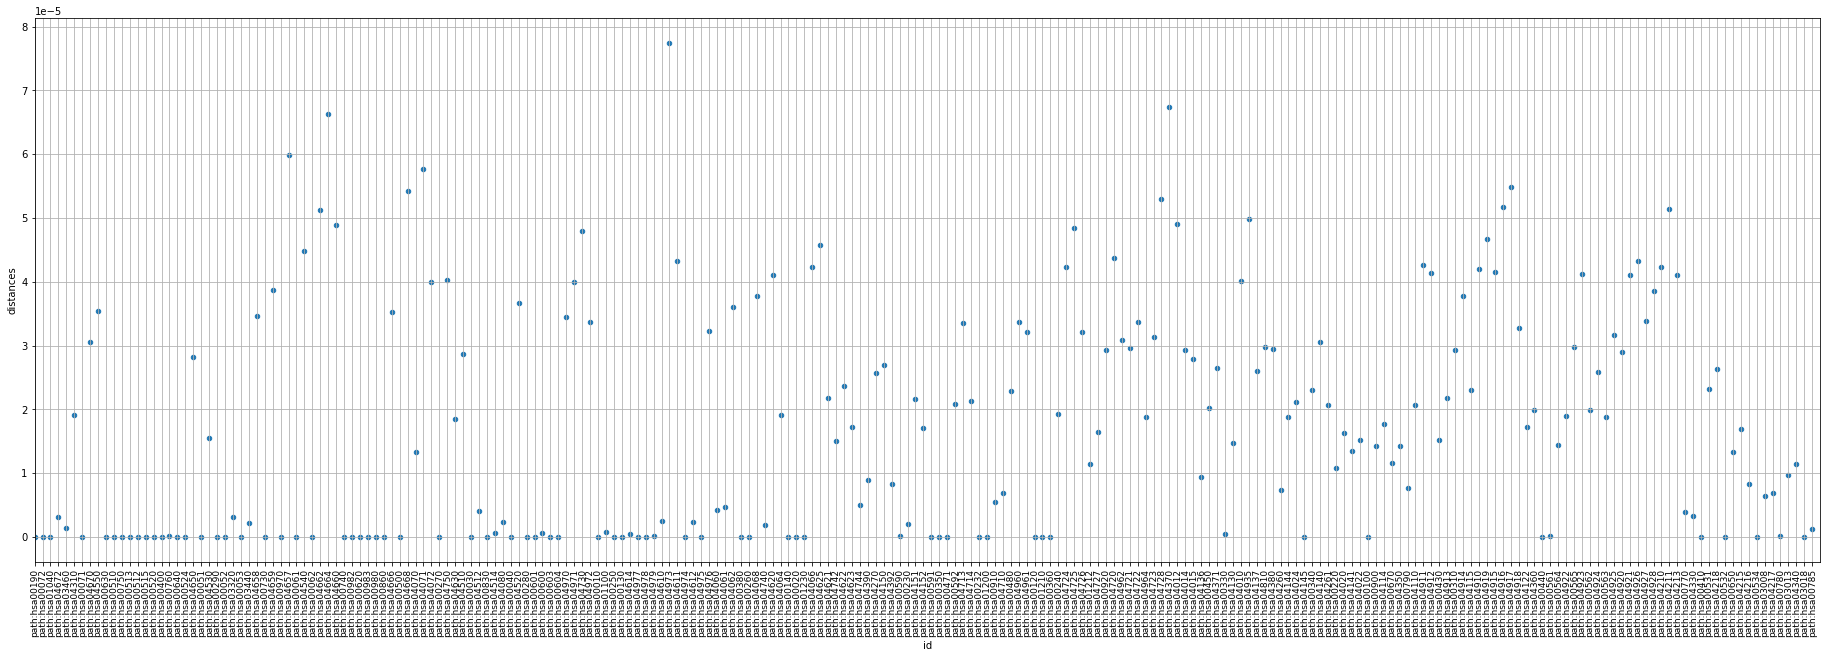

In [157]:
plotd = pdDistanceControlBasal.plot(x="id",y="distances",kind='scatter',figsize=[32,10],grid=True,xticks=pdDistanceControlLumA["id"],rot=90)
plotd.set_xlim([0,225])
plotd.set_xticklabels(basalEmbeddingsWithIdFiltered["pathway_id"], rotation=90)
plotd.tick_params(axis='x',labelsize=9)

# control - LumA

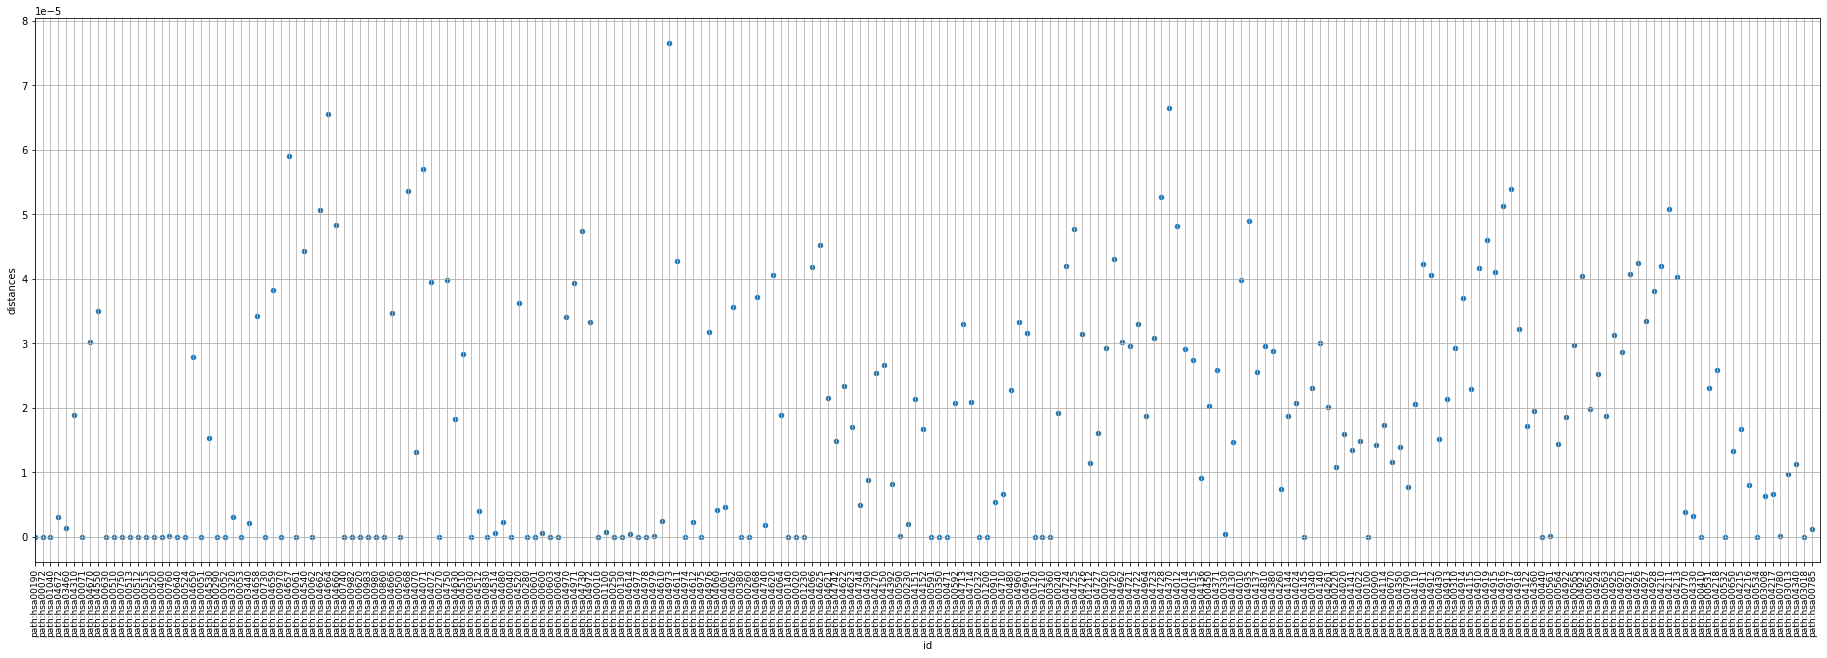

In [158]:
plotd = pdDistanceControlLumA.plot(x="id",y="distances",kind='scatter',figsize=[32,10],grid=True,xticks=pdDistanceControlLumA["id"],rot=90)
plotd.set_xlim([0,225])
plotd.set_xticklabels(basalEmbeddingsWithIdFiltered["pathway_id"], rotation=90)
plotd.tick_params(axis='x',labelsize=9)

# control - LumB

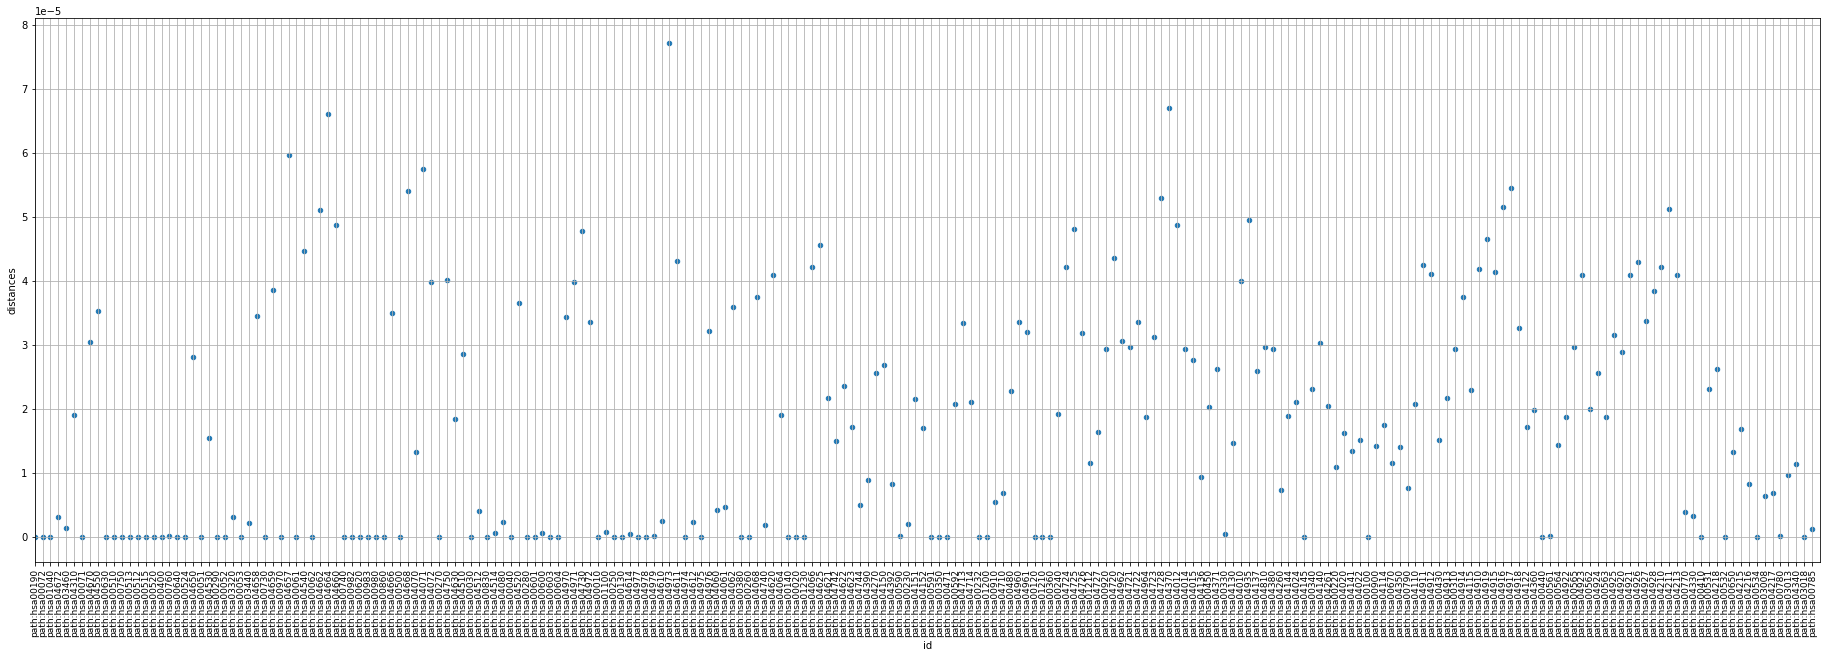

In [159]:
plotd = pdDistanceControlLumB.plot(x="id",y="distances",kind='scatter',figsize=[32,10],grid=True,xticks=pdDistanceControlLumA["id"],rot=90)
plotd.set_xlim([0,225])
plotd.set_xticklabels(basalEmbeddingsWithIdFiltered["pathway_id"], rotation=90)
plotd.tick_params(axis='x',labelsize=9)

# controls distances plot

(0.0, 225.0)

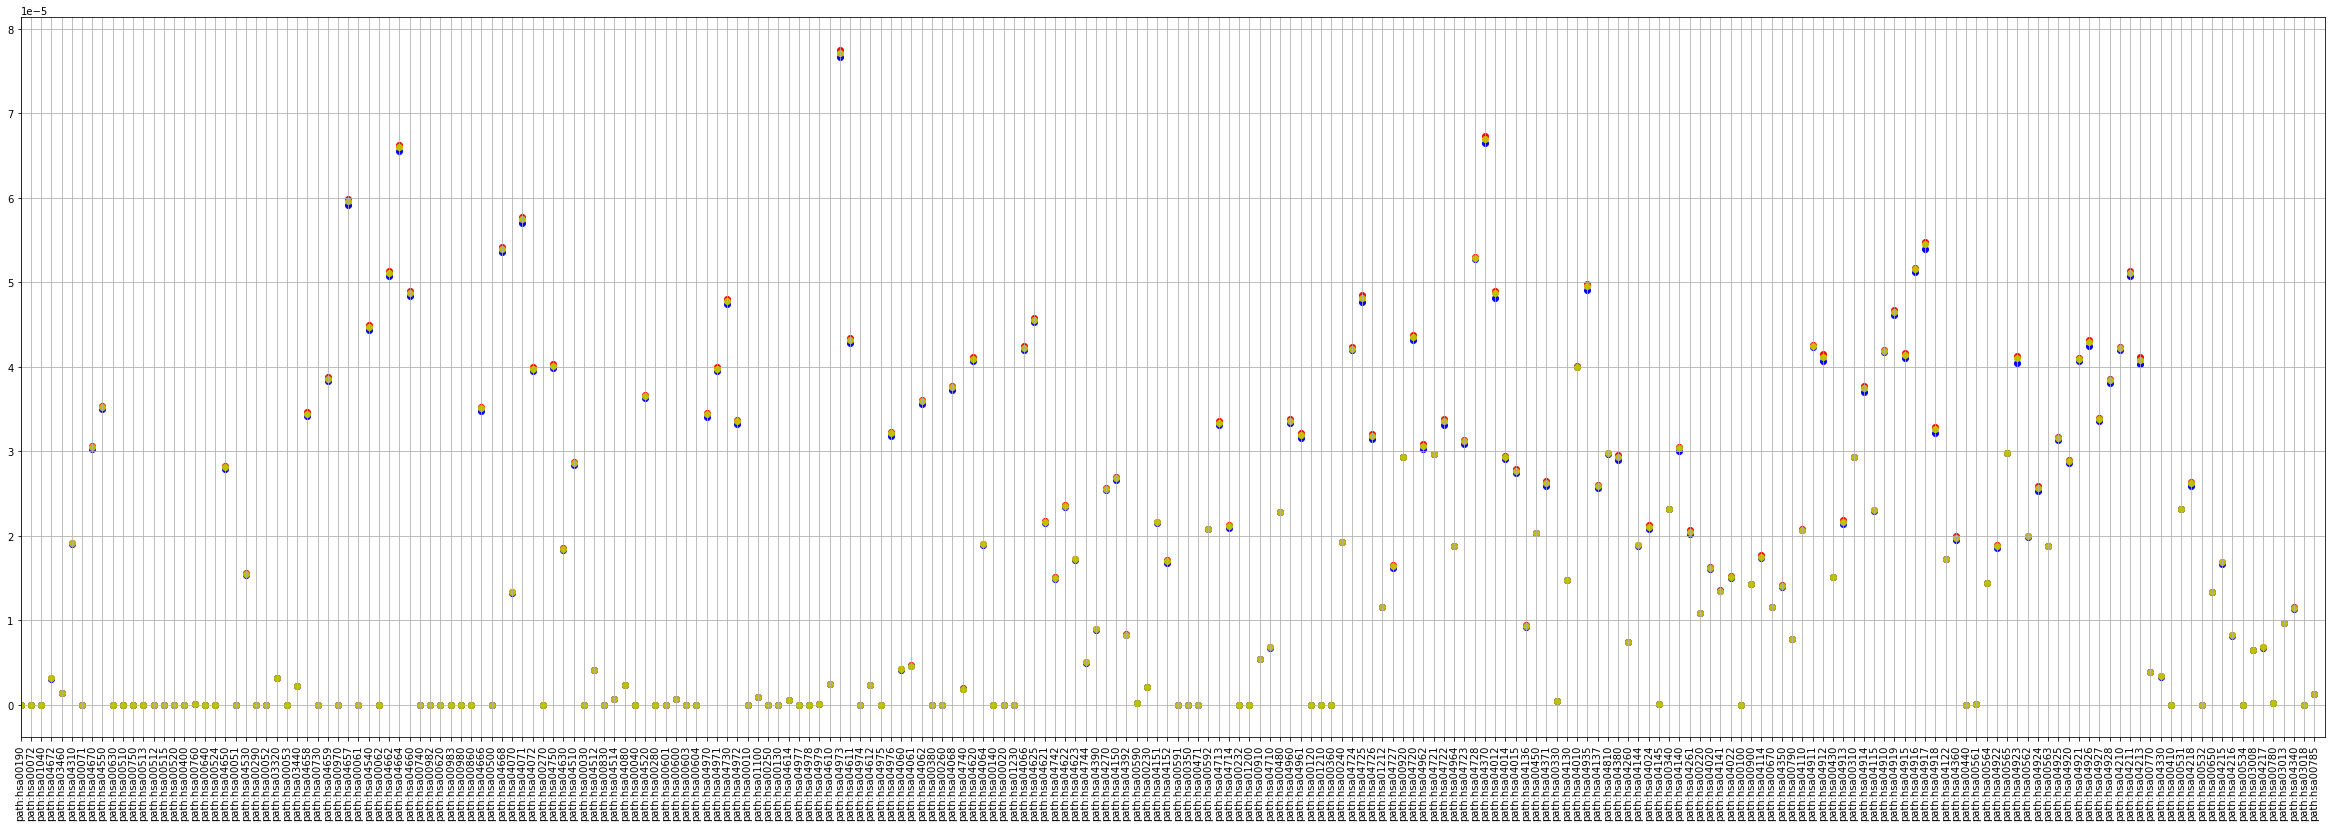

In [185]:
import itertools

ys = [pdDistanceControlBasal["distances"],
      pdDistanceControlLumA["distances"],
      pdDistanceControlLumB["distances"]]

colors = itertools.cycle(["r", "b", "y"])
fig = plt.figure(figsize=[32,10])
ax=fig.add_axes([0,0,1,1])
for y in ys:
    ax.scatter(pdDistanceControlLumA["id"], y, color=next(colors))
ax.grid(which="both")
plt.xticks(pdDistanceControlLumA["id"])
ax.set_xticklabels(basalEmbeddingsWithIdFiltered["pathway_id"], rotation=90)
plt.xlim([0,225])

# LumA - LumB

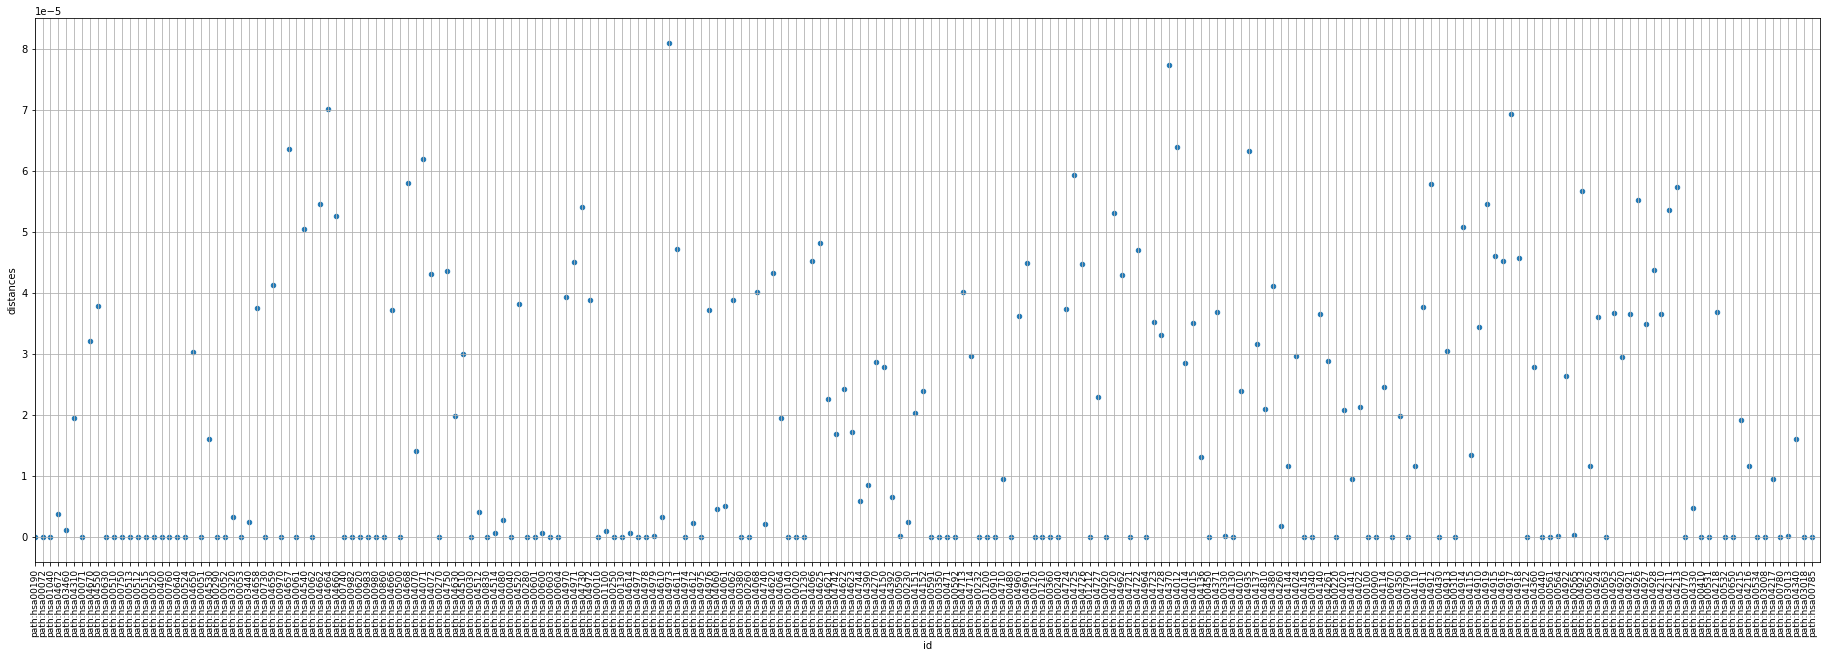

In [160]:
plotd = pdDistanceLumALumB.plot(x="id",y="distances",kind='scatter',figsize=[32,10],grid=True,xticks=pdDistanceControlLumA["id"],rot=90)
plotd.set_xlim([0,225])
plotd.set_xticklabels(basalEmbeddingsWithIdFiltered["pathway_id"], rotation=90)
plotd.tick_params(axis='x',labelsize=9)

# Basal - LumB

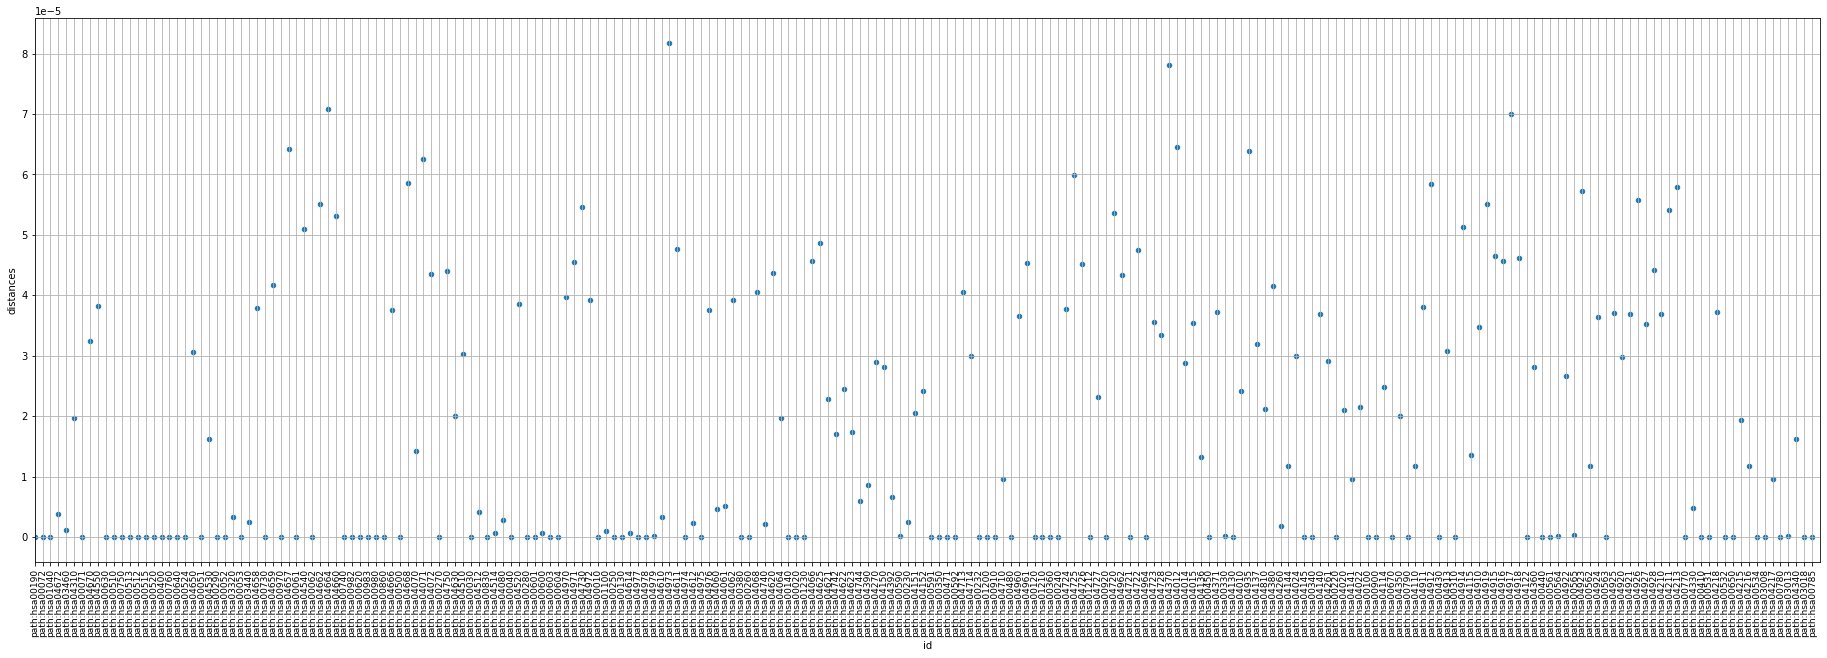

In [161]:
plotd = pdDistanceBasalLumB.plot(x="id",y="distances",kind='scatter',figsize=[32,10],grid=True,xticks=pdDistanceControlLumA["id"],rot=90)
plotd.set_xlim([0,225])
plotd.set_xticklabels(basalEmbeddingsWithIdFiltered["pathway_id"], rotation=90)
plotd.tick_params(axis='x',labelsize=9)

# Basal - LumA

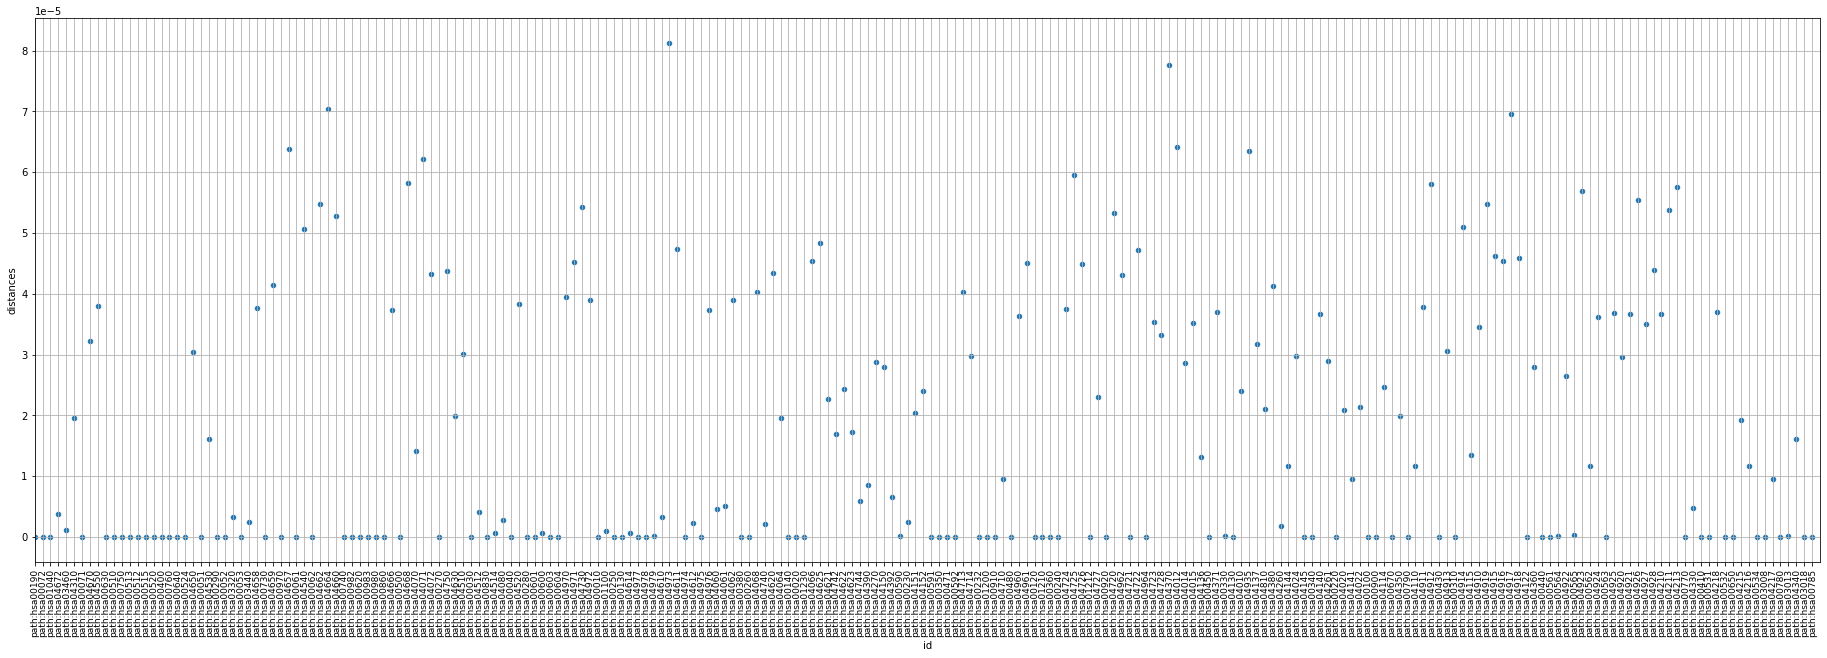

In [162]:
plotd = pdDistanceBasalLumA.plot(x="id",y="distances",kind='scatter',figsize=[32,10],grid=True,xticks=pdDistanceControlLumA["id"],rot=90)
plotd.set_xlim([0,225])
plotd.set_xticklabels(basalEmbeddingsWithIdFiltered["pathway_id"], rotation=90)
plotd.tick_params(axis='x',labelsize=9)

(0.0, 225.0)

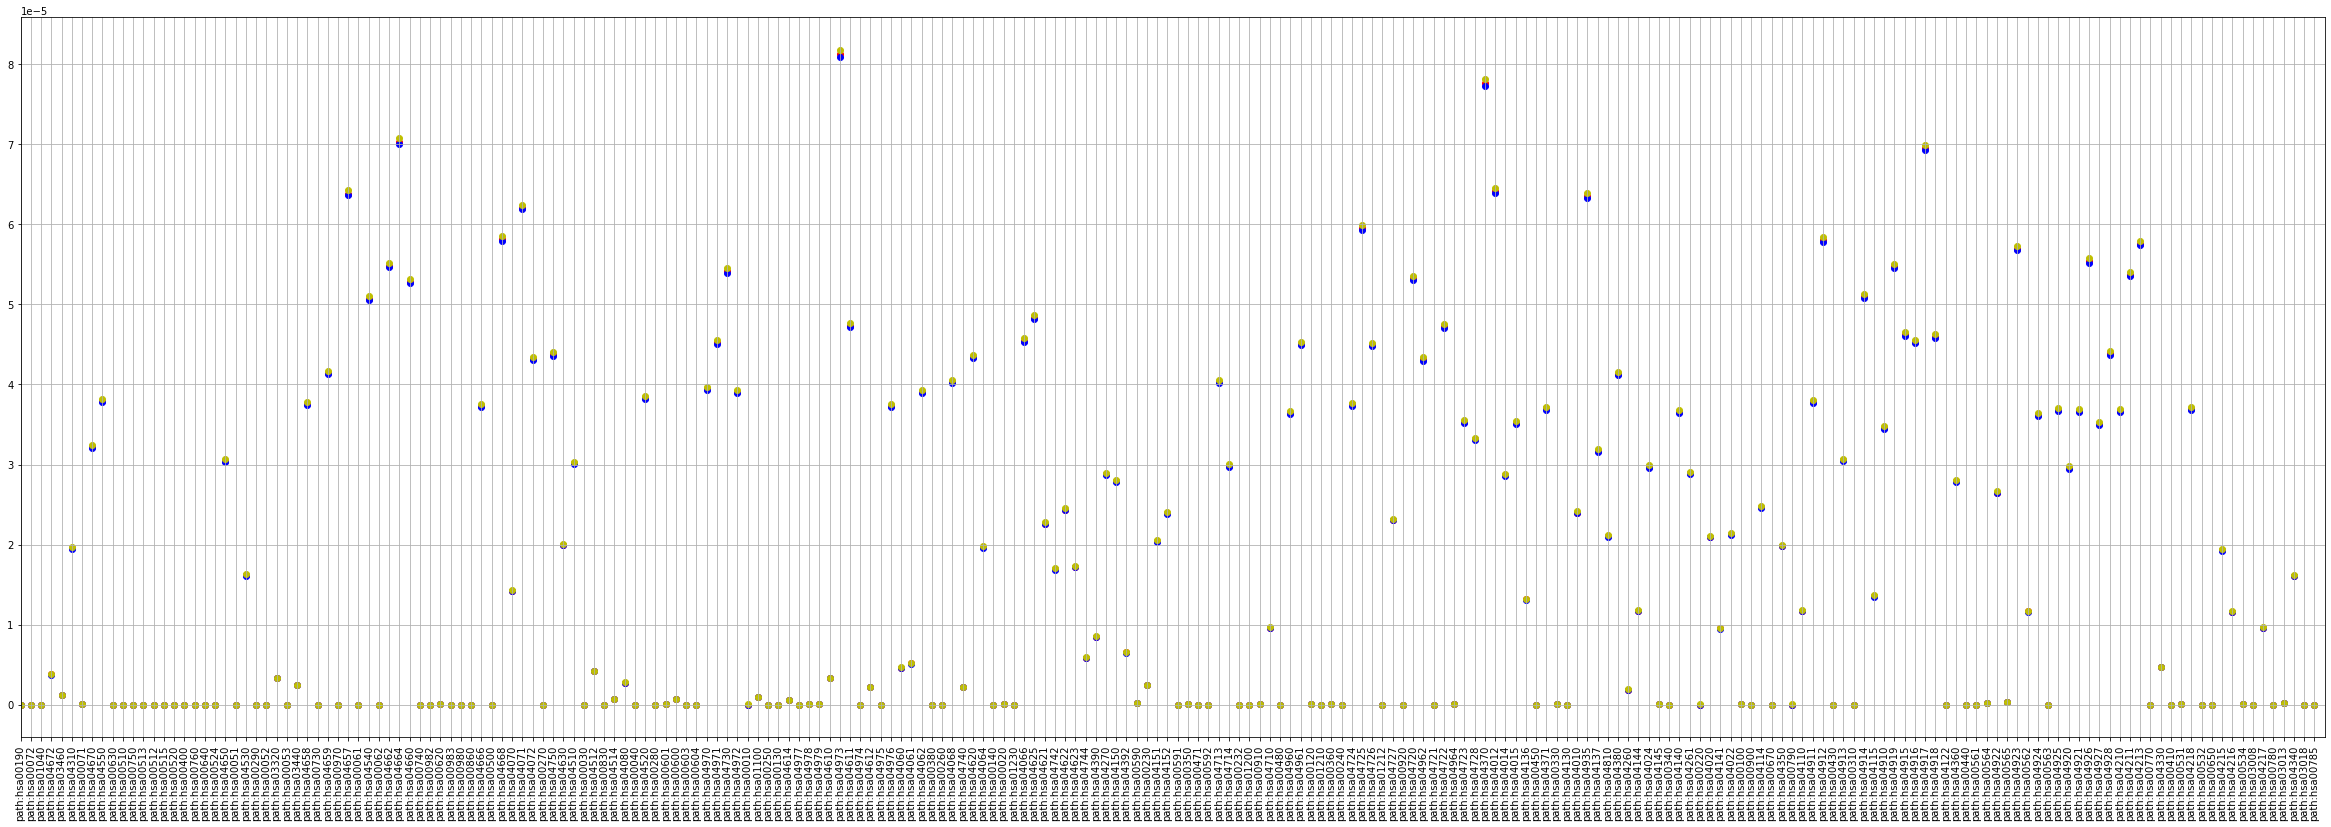

In [186]:

ys = [pdDistanceBasalLumA["distances"],
      pdDistanceLumALumB["distances"],
      pdDistanceBasalLumB["distances"]]

colors = itertools.cycle(["r", "b", "y"])
fig = plt.figure(figsize=[32,10])
ax=fig.add_axes([0,0,1,1])
for y in ys:
    ax.scatter(pdDistanceControlLumA["id"], y, color=next(colors))
ax.grid(which="both")
plt.xticks(pdDistanceControlLumA["id"])
ax.set_xticklabels(basalEmbeddingsWithIdFiltered["pathway_id"], rotation=90)
plt.xlim([0,225])